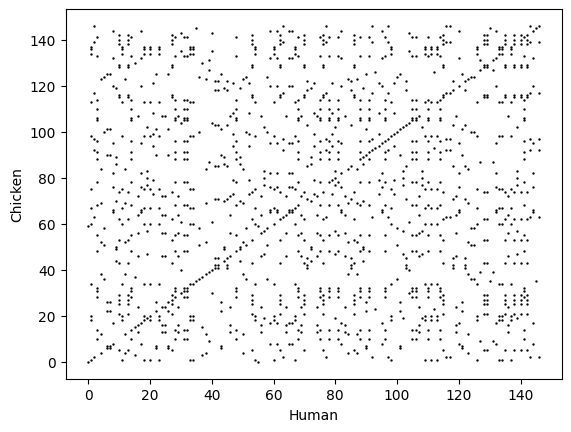


Matching segments between the sequences:
Residues 1-3
Residue 5
Residues 7-9
Residue 13
Residues 15-21
Residue 23
Residue 25
Residues 27-29
Residues 31-33
Residues 35-43
Residues 45-47
Residues 49-50
Residue 52
Residue 54
Residues 57-59
Residue 61
Residues 63-69
Residue 72
Residue 74
Residues 79-81
Residue 83
Residues 85-86
Residues 89-108
Residue 111
Residues 114-116
Residues 118-119
Residue 121
Residues 123-125
Residues 128-130
Residues 132-133
Residue 135
Residues 138-139
Residues 141-143
Residues 145-147


In [ ]:
import matplotlib.pyplot as plt

human_seq = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
chicken_seq = "MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH"

plt.figure(dpi=100)

matching_positions = []

for i, human_char in enumerate(human_seq):
    for j, chicken_char in enumerate(chicken_seq):
        if human_char == chicken_char:
            plt.scatter(i, j, c="black", s=0.5)
            if i == j:
                matching_positions.append(i + 1)

plt.xlabel("Human")
plt.ylabel("Chicken")
plt.show()

print("\nMatching segments between the sequences:")

continuous_segment = []
for match in matching_positions:
    if not continuous_segment or match - continuous_segment[-1] == 1:
        continuous_segment.append(match)
    else:
        print(f"Residues {continuous_segment[0]}-{continuous_segment[-1]}" if len(continuous_segment) > 1 else f"Residue {continuous_segment[0]}")
        continuous_segment = [match]

if continuous_segment:
    print(f"Residues {continuous_segment[0]}-{continuous_segment[-1]}" if len(continuous_segment) > 1 else f"Residue {continuous_segment[0]}")


In [ ]:
#Question2
seq1 = "AACTCATA"
seq2 = "AAG--ATA"

score = 0
match_score = 1
mismatch_penalty = 0
gap_open_penalty = 2
gap_extension_penalty = 1
gap_active = False

for i in range(len(seq1)):
    if seq1[i] == "-" or seq2[i] == "-":
        if not gap_active:
            score -= gap_open_penalty + gap_extension_penalty
            gap_active = True
        else:
            score -= gap_extension_penalty
    else:
        gap_active = False
        if seq1[i] == seq2[i]:
            score += match_score
        else:
            score -= mismatch_penalty

print(f"\nThe alignment score is {score}.")




The alignment score is 1.


In [ ]:
#Qustion4
def needleman_wunsch(seq1, seq2, match=2, mismatch=-1, gap=-2):
    m, n = len(seq1), len(seq2)

    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]

    for i in range(1, m+1):
        dp[i][0] = dp[i-1][0] + gap
    for j in range(1, n+1):
        dp[0][j] = dp[0][j-1] + gap

    #DP table
    for i in range(1, m+1):
        for j in range(1, n+1):
            diag_score = dp[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            up_score = dp[i-1][j] + gap
            left_score = dp[i][j-1] + gap
            dp[i][j] = max(diag_score, up_score, left_score)

    # Traceback
    align1, align2 = "", ""
    i, j = m, n
    while i > 0 and j > 0:
        current_score = dp[i][j]
        score_diag = dp[i-1][j-1]
        score_up = dp[i-1][j]
        score_left = dp[i][j-1]
        if current_score == score_diag + (match if seq1[i-1] == seq2[j-1] else mismatch):
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif current_score == score_up + gap:
            align1 = seq1[i-1] + align1
            align2 = "-" + align2
            i -= 1
        else:  # current_score == score_left + gap
            align1 = "-" + align1
            align2 = seq2[j-1] + align2
            j -= 1

    while i > 0:
        align1 = seq1[i-1] + align1
        align2 = "-" + align2
        i -= 1
    while j > 0:
        align1 = "-" + align1
        align2 = seq2[j-1] + align2
        j -= 1

    optimal_score = dp[m][n]

    return dp, align1, align2, optimal_score

def print_dp_table(dp):
    for row in dp:
        print(" ".join(f"{cell:4}" for cell in row))

# Given sequences
seq1 = "ACAGTCGAACG"
seq2 = "ACCGTCCG"

dp_table, alignment1, alignment2, optimal_score = needleman_wunsch(seq1, seq2, match=2, mismatch=-1, gap=-2)

print("DP Table:")
print_dp_table(dp_table)

# Print the resulting alignment
print("\nOptimal Alignment:")
print(alignment1)
print(alignment2)

# Print the optimal alignment score
print("\nOptimal Alignment Score:", optimal_score)


DP Table:
   0   -2   -4   -6   -8  -10  -12  -14  -16
  -2    2    0   -2   -4   -6   -8  -10  -12
  -4    0    4    2    0   -2   -4   -6   -8
  -6   -2    2    3    1   -1   -3   -5   -7
  -8   -4    0    1    5    3    1   -1   -3
 -10   -6   -2   -1    3    7    5    3    1
 -12   -8   -4    0    1    5    9    7    5
 -14  -10   -6   -2    2    3    7    8    9
 -16  -12   -8   -4    0    1    5    6    7
 -18  -14  -10   -6   -2   -1    3    4    5
 -20  -16  -12   -8   -4   -3    1    5    3
 -22  -18  -14  -10   -6   -5   -1    3    7

Optimal Alignment:
ACAGTCGAACG
ACCGTC---CG

Optimal Alignment Score: 7


In [ ]:
#question6
import numpy as np

match_score = 2
mismatch_score = -1
gap_penalty = -2

seq1 = "ACGTATCGCGTATA"
seq2 = "GATGCGTATCG"

rows = len(seq1) + 1
cols = len(seq2) + 1
score_matrix = np.zeros((rows, cols), dtype=int)

max_score = 0
max_pos = None

for i in range(1, rows):
    for j in range(1, cols):
        match = score_matrix[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
        delete = score_matrix[i-1, j] + gap_penalty
        insert = score_matrix[i, j-1] + gap_penalty
        score_matrix[i, j] = max(match, delete, insert, 0)

        if score_matrix[i, j] > max_score:
            max_score = score_matrix[i, j]
            max_pos = (i, j)

print("Smith-Waterman Alignment Score Matrix:")
print(score_matrix)

aligned_seq1 = ""
aligned_seq2 = ""
i, j = max_pos

while score_matrix[i, j] > 0:
    if i > 0 and j > 0 and score_matrix[i, j] == score_matrix[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score):
        aligned_seq1 = seq1[i-1] + aligned_seq1
        aligned_seq2 = seq2[j-1] + aligned_seq2
        i -= 1
        j -= 1
    elif i > 0 and score_matrix[i, j] == score_matrix[i-1, j] + gap_penalty:
        aligned_seq1 = seq1[i-1] + aligned_seq1
        aligned_seq2 = "-" + aligned_seq2
        i -= 1
    else:
        aligned_seq1 = "-" + aligned_seq1
        aligned_seq2 = seq2[j-1] + aligned_seq2
        j -= 1

print("\nOptimal Local Alignment:")
print(aligned_seq1)
print(aligned_seq2)


Smith-Waterman Alignment Score Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  2  0  0  0  1  2  0]
 [ 0  2  0  0  3  1  4  2  0  0  0  4]
 [ 0  0  1  2  1  2  2  6  4  2  0  2]
 [ 0  0  2  0  1  0  1  4  8  6  4  2]
 [ 0  0  0  4  2  0  0  3  6 10  8  6]
 [ 0  0  0  2  3  4  2  1  4  8 12 10]
 [ 0  2  0  0  4  2  6  4  2  6 10 14]
 [ 0  0  1  0  2  6  4  5  3  4  8 12]
 [ 0  2  0  0  2  4  8  6  4  2  6 10]
 [ 0  0  1  2  0  2  6 10  8  6  4  8]
 [ 0  0  2  0  1  0  4  8 12 10  8  6]
 [ 0  0  0  4  2  0  2  6 10 14 12 10]
 [ 0  0  2  2  3  1  0  4  8 12 13 11]]

Optimal Local Alignment:
CGTATCG
CGTATCG
